In [2]:
import numpy as np

In [14]:
print(np.sin(np.pi/4))

0.7071067811865475


In [18]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [20]:
fs=10e3
N=1e5
amp=2*np.sqrt(2)
noise_power=0.01*fs/2
time=np.arange(N)/float(fs)
mod=500*np.cos(2*np.pi*0.25*time)
carrier=amp*np.sin(2*np.pi*3e3*time+mod)
noise=np.random.normal(scale=np.sqrt(noise_power),size=time.shape)
noise *=np.exp(-time/5)
x=carrier+noise

In [32]:
x

array([  7.43535932, -11.37404901,  -0.15642999, ...,   0.06751838,
        -1.51930675,   2.53062136])

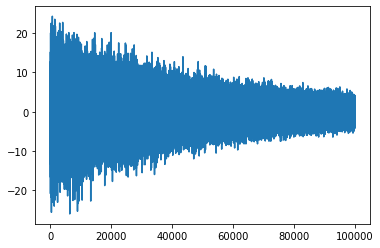

In [22]:
plt.plot(x)

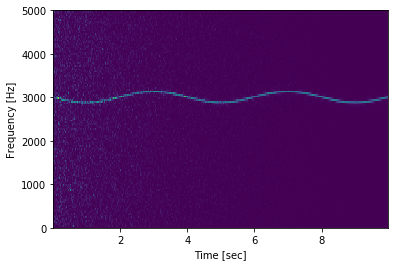

In [23]:
f,t,Sxx=signal.spectrogram(x,fs)
plt.pcolormesh(t,f,Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [24]:
import pandas as pd

In [27]:
df=pd.read_csv("../Datos en Csv/Edificio 6px3 3cx4 2cx4  Grado 7.2.csv",sep=';')

In [30]:
df.head()

,T,DXP (m),DZP (m),DXU (m),DZU (m),AXP (m/s^2),AZP (m/s^2),AXU (m/s^2),AZU (m/s^2)
0,0.005,2.190200e-08,9.046300e-08,2.112400e-08,9.108900e-08,0.001738,0.007177,0.001676,0.007227
1,0.010,7.247400e-08,3.887400e-07,7.589500e-08,4.085400e-07,0.000590,0.009528,0.001044,0.010952
2,0.015,9.921300e-08,8.562100e-07,1.235200e-07,9.698800e-07,-0.002502,0.004019,-0.001618,0.008563
3,0.020,6.435000e-08,1.345000e-06,1.191500e-07,1.700100e-06,-0.002448,-0.002311,-0.002554,0.004958
4,0.025,-3.633600e-08,1.705000e-06,5.074000e-08,2.487300e-06,-0.002800,-0.008008,-0.002568,-0.000396


In [31]:
df["DZP (m)"].values

array([9.0463e-08, 3.8874e-07, 8.5621e-07, ..., 9.3606e-05, 1.0880e-04,
       1.2224e-04])

In [42]:
dzp=df["DZP (m)"].values

In [43]:
fs=200

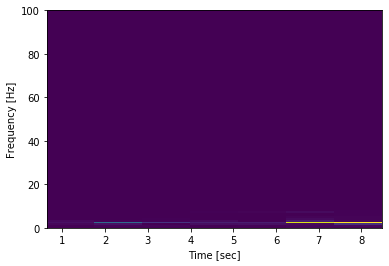

In [44]:
f,t,Sxx=signal.spectrogram(dzp,fs)
plt.pcolormesh(t,f,Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

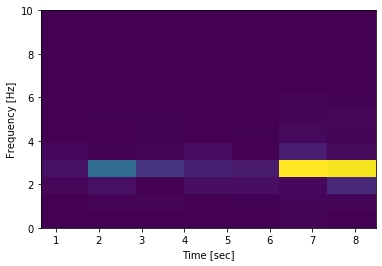

In [49]:
dzu=df["DZU (m)"].values
fs=200
f,t,Sxx=signal.spectrogram(dzu,fs)
plt.pcolormesh(t,f,Sxx)
plt.ylim(0,10)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [47]:
np.max(dzu)

0.00093565

In [50]:
dzu=df["DZU (m)"].values
dxu=df["DXU (m)"].values

In [69]:
np.sqrt(dxu**2+dzu**2)

array([9.35063062e-08, 4.15529761e-07, 9.77713867e-07, ...,
       1.59705947e-03, 1.65807493e-03, 1.71212669e-03])

In [59]:
dxu

array([2.1124e-08, 7.5895e-08, 1.2352e-07, ..., 1.4781e-03, 1.5265e-03,
       1.5695e-03])

In [56]:
dzu

array([9.1089e-08, 4.0854e-07, 9.6988e-07, ..., 6.0483e-04, 6.4731e-04,
       6.8414e-04])

In [55]:
np.sqrt(25)

5.0

In [60]:
dxu+dzu

array([1.12213e-07, 4.84435e-07, 1.09340e-06, ..., 2.08293e-03,
       2.17381e-03, 2.25364e-03])

In [65]:
Sxx.shape

(129, 8)

In [66]:
Sxx

array([[8.44926690e-12, 8.96240354e-10, 9.65756423e-10, ...,
        2.56537940e-09, 5.21583335e-10, 3.02410225e-09],
       [1.19206351e-10, 2.65759701e-09, 2.29096822e-09, ...,
        3.35253962e-09, 3.80119310e-09, 5.88739233e-09],
       [4.45756417e-09, 1.06343448e-08, 4.30804321e-10, ...,
        5.44414018e-09, 3.03017950e-08, 7.02909271e-10],
       ...,
       [1.28590988e-21, 8.84324221e-20, 4.15306549e-21, ...,
        1.15657272e-19, 3.59705077e-21, 1.15919403e-19],
       [5.98517959e-20, 2.57915656e-20, 6.68337910e-20, ...,
        5.83790095e-20, 1.41058764e-19, 6.41577421e-21],
       [1.05776960e-20, 4.20660220e-22, 2.74354344e-20, ...,
        6.82802079e-22, 5.15262858e-21, 1.60760105e-21]])

In [67]:
f.shape

(129,)

In [68]:
f

array([  0.     ,   0.78125,   1.5625 ,   2.34375,   3.125  ,   3.90625,
         4.6875 ,   5.46875,   6.25   ,   7.03125,   7.8125 ,   8.59375,
         9.375  ,  10.15625,  10.9375 ,  11.71875,  12.5    ,  13.28125,
        14.0625 ,  14.84375,  15.625  ,  16.40625,  17.1875 ,  17.96875,
        18.75   ,  19.53125,  20.3125 ,  21.09375,  21.875  ,  22.65625,
        23.4375 ,  24.21875,  25.     ,  25.78125,  26.5625 ,  27.34375,
        28.125  ,  28.90625,  29.6875 ,  30.46875,  31.25   ,  32.03125,
        32.8125 ,  33.59375,  34.375  ,  35.15625,  35.9375 ,  36.71875,
        37.5    ,  38.28125,  39.0625 ,  39.84375,  40.625  ,  41.40625,
        42.1875 ,  42.96875,  43.75   ,  44.53125,  45.3125 ,  46.09375,
        46.875  ,  47.65625,  48.4375 ,  49.21875,  50.     ,  50.78125,
        51.5625 ,  52.34375,  53.125  ,  53.90625,  54.6875 ,  55.46875,
        56.25   ,  57.03125,  57.8125 ,  58.59375,  59.375  ,  60.15625,
        60.9375 ,  61.71875,  62.5    ,  63.28125, 

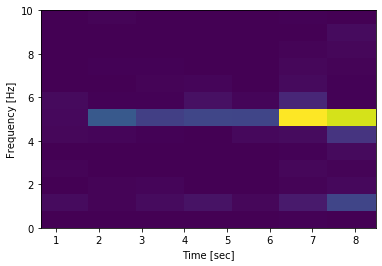

In [70]:
f,t,Sxx=signal.spectrogram(np.sqrt(dxu**2+dzu**2),fs)
plt.pcolormesh(t,f,Sxx)
plt.ylim(0,10)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [116]:
dzu_200=df["DZU (m)"][0:256].values
dxu_200=df["DXU (m)"][0:256].values

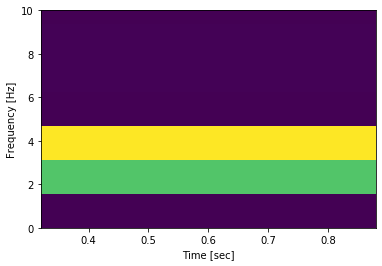

In [123]:
f,t,Sxx=signal.spectrogram(dzu_200,fs,nperseg=128)
plt.pcolormesh(t,f,Sxx)
plt.ylim(0,10)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [124]:
t.shape

(2,)

In [114]:
256*8

2048